In [1]:
import numpy as np

In [2]:
def init_q_table(n_states,n_actions):
  return np.zeros((n_states, n_actions))

In [3]:
init_q_table(2,3)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [4]:
def q_update(Q,s,a,r,s_next,alp, gama):
  max_Q_next = np.max(Q[s_next])
  td_target = r + gama* max_Q_next
  td_error  = td_target - Q[s,a]
  Q[s,a] = Q[s,a] + alp*td_error
  return Q


In [5]:
import numpy as np

class GridWorld:
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.n_states = grid_size * grid_size
        self.n_actions = 4
        self.terminal_states = [0, self.n_states - 1]
        self.reset()

    def reset(self):
        self.state = self.grid_size * (self.grid_size // 2) + (self.grid_size // 2)
        return self.state

    def step(self, action):
        row, col = divmod(self.state, self.grid_size)

        if self.state in self.terminal_states:
            return self.state, 0, True

        if action == 0 and row > 0:
            row -= 1
        elif action == 1 and row < self.grid_size - 1:
            row += 1
        elif action == 2 and col > 0:
            col -= 1
        elif action == 3 and col < self.grid_size - 1:
            col += 1

        new_state = row * self.grid_size + col
        self.state = new_state

        reward = 1 if new_state in self.terminal_states else -0.1
        done = new_state in self.terminal_states
        return new_state, reward, done

    def get_state(self):
        return self.state

    def get_action_space(self):
        return list(range(self.n_actions))

    def get_state_space(self):
        return list(range(self.n_states))


In [6]:
env = GridWorld()
state = env.reset()
print("Initial State:", state)

next_state, reward, done = env.step(0)
print("Next State:", next_state, "Reward:", reward, "Done:", done)

Initial State: 10
Next State: 6 Reward: -0.1 Done: False


In [7]:
import numpy as np

def select_action(Q, state, ε):
    if np.random.rand() < ε:
        return np.random.randint(Q.shape[1])
    else:
        return np.argmax(Q[state])

In [8]:
Q = np.random.rand(16, 4)
state = 5
ε = 0.1
action = select_action(Q, state, ε)
print("Selected Action:", action)

Selected Action: 3


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class GridWorld:
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.n_states = grid_size * grid_size
        self.n_actions = 4
        self.terminal_states = [0, self.n_states - 1]
        self.reset()

    def reset(self):
        self.state = self.grid_size * (self.grid_size // 2) + (self.grid_size // 2)
        return self.state

    def step(self, action):
        row, col = divmod(self.state, self.grid_size)

        if self.state in self.terminal_states:
            return self.state, 0, True

        if action == 0 and row > 0: row -= 1
        elif action == 1 and row < self.grid_size - 1: row += 1
        elif action == 2 and col > 0: col -= 1
        elif action == 3 and col < self.grid_size - 1: col += 1

        new_state = row * self.grid_size + col
        self.state = new_state

        reward = 1 if new_state in self.terminal_states else -0.1
        done = new_state in self.terminal_states
        return new_state, reward, done

def init_q_table(n_states, n_actions):
    return np.zeros((n_states, n_actions))

def q_update(Q, s, a, r, s_next, α, γ):
    Q[s, a] += α * (r + γ * np.max(Q[s_next]) - Q[s, a])
    return Q

def select_action(Q, state, ε):
    if np.random.rand() < ε:
        return np.random.randint(Q.shape[1])
    else:
        return np.argmax(Q[state])

In [10]:
def train_agent(ε, episodes=500, α=0.1, γ=0.99):
    env = GridWorld()
    Q = init_q_table(env.n_states, env.n_actions)
    rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = select_action(Q, state, ε)
            next_state, reward, done = env.step(action)
            Q = q_update(Q, state, action, reward, next_state, α, γ)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return rewards

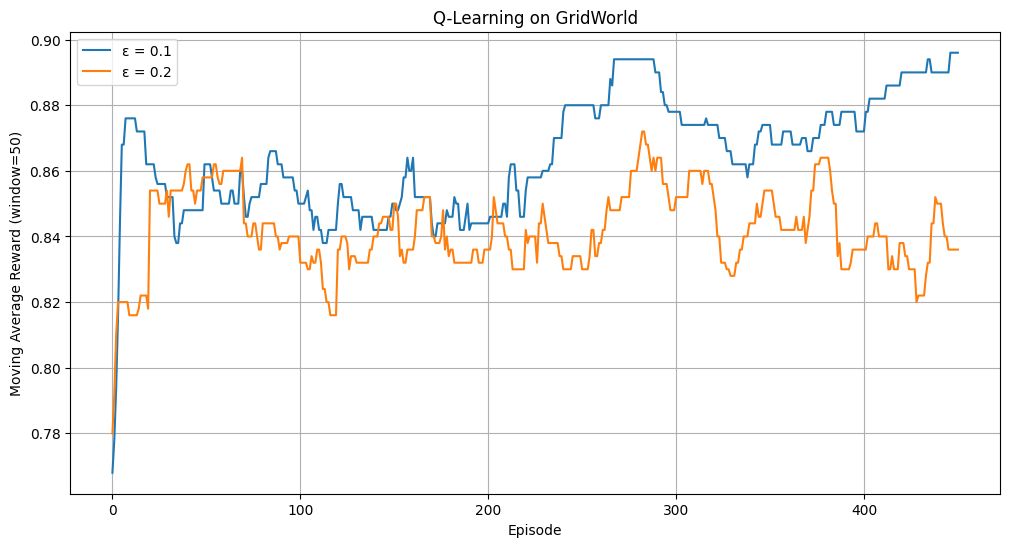

In [11]:
rewards_01 = train_agent(ε=0.1)
rewards_02 = train_agent(ε=0.2)

def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))
plt.plot(moving_average(rewards_01), label='ε = 0.1')
plt.plot(moving_average(rewards_02), label='ε = 0.2')
plt.xlabel('Episode')
plt.ylabel('Moving Average Reward (window=50)')
plt.title('Q-Learning on GridWorld')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import random
from collections import deque

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        """
        Stores a transition in the buffer.
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """
        Samples a batch of transitions.
        Returns:
            Tuple of numpy arrays: (states, actions, rewards, next_states, dones)
        """
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        return (
            np.array(states),
            np.array(actions),
            np.array(rewards, dtype=np.float32),
            np.array(next_states),
            np.array(dones, dtype=np.bool_)
        )

    def __len__(self):
        return len(self.buffer)


In [13]:
buffer = ReplayBuffer(capacity=100)

for _ in range(100):
    state = np.random.randint(0, 16)
    action = np.random.randint(0, 4)
    reward = np.random.uniform(-1.0, 1.0)
    next_state = np.random.randint(0, 16)
    done = np.random.choice([True, False])
    buffer.push(state, action, reward, next_state, done)

batch = buffer.sample(32)
states, actions, rewards, next_states, dones = batch

print("Shapes:")
print("States:", states.shape)
print("Actions:", actions.shape)
print("Rewards:", rewards.shape)
print("Next States:", next_states.shape)
print("Dones:", dones.shape)

print("\nData Types:")
print("States:", states.dtype)
print("Actions:", actions.dtype)
print("Rewards:", rewards.dtype)
print("Next States:", next_states.dtype)
print("Dones:", dones.dtype)


Shapes:
States: (32,)
Actions: (32,)
Rewards: (32,)
Next States: (32,)
Dones: (32,)

Data Types:
States: int64
Actions: int64
Rewards: float32
Next States: int64
Dones: bool


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DQNPolicy(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNPolicy, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)


In [15]:
class DQNTarget(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNTarget, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)


In [16]:
def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())


In [17]:
obs_dim = 4   # For example, CartPole has 4 observations
n_actions = 2 # e.g., Left or Right

policy_net = DQNPolicy(obs_dim, n_actions)
target_net = DQNTarget(obs_dim, n_actions)

# Update target with policy weights
update_target(policy_net, target_net)

# Test forward pass
sample_input = torch.rand((1, obs_dim))
print(policy_net(sample_input))


tensor([[ 0.1723, -0.0982]], grad_fn=<AddmmBackward0>)


In [18]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt


class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.out = nn.Linear(128, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

def update_target(policy_net, target_net):
    target_net.load_state_dict(policy_net.state_dict())


In [19]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        return (
            torch.tensor(states, dtype=torch.float32),
            torch.tensor(actions, dtype=torch.long),
            torch.tensor(rewards, dtype=torch.float32),
            torch.tensor(next_states, dtype=torch.float32),
            torch.tensor(dones, dtype=torch.bool)
        )

    def __len__(self):
        return len(self.buffer)


In [20]:
# Hyperparameters
N = 500              # Episodes
M = N                # Epsilon decay steps
X = 10               # Target update interval
BATCH_SIZE = 64
GAMMA = 0.99
LR = 1e-3
BUFFER_CAPACITY = 10000

# Setup
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
n_actions = env.action_space.n

policy_net = DQN(obs_dim, n_actions)
target_net = DQN(obs_dim, n_actions)
update_target(policy_net, target_net)

optimizer = optim.Adam(policy_net.parameters(), lr=LR)
replay_buffer = ReplayBuffer(BUFFER_CAPACITY)

rewards_per_episode = []
success_count = 0

epsilon_start = 1.0
epsilon_final = 0.01

def select_action(state, ε):
    if random.random() < ε:
        return random.randint(0, n_actions - 1)
    else:
        with torch.no_grad():
            return policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0)).argmax().item()


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [21]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [23]:
for episode in range(N):
    state = env.reset()
    total_reward = 0

    epsilon = max(epsilon_final, epsilon_start - (epsilon_start - epsilon_final) * (episode / M))

    done = False
    while not done:
        action = select_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        replay_buffer.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(replay_buffer) >= BATCH_SIZE:
            states, actions, rewards, next_states, dones = replay_buffer.sample(BATCH_SIZE)

            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)

            next_q_values = target_net(next_states).max(1)[0]
            next_q_values[dones] = 0.0
            target_q = rewards + GAMMA * next_q_values

            loss = F.mse_loss(q_values, target_q.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    rewards_per_episode.append(total_reward)
    if total_reward >= 195:
        success_count += 1

    if episode % X == 0:
        update_target(policy_net, target_net)

    if episode % 50 == 0:
        print(f"Episode {episode}, Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")


Episode 0, Reward: 24.00, Epsilon: 1.000


<ipython-input-19-d88945bfe567>:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  torch.tensor(states, dtype=torch.float32),


Episode 50, Reward: 12.00, Epsilon: 0.901
Episode 100, Reward: 10.00, Epsilon: 0.802
Episode 150, Reward: 30.00, Epsilon: 0.703
Episode 200, Reward: 73.00, Epsilon: 0.604
Episode 250, Reward: 28.00, Epsilon: 0.505
Episode 300, Reward: 51.00, Epsilon: 0.406
Episode 350, Reward: 28.00, Epsilon: 0.307
Episode 400, Reward: 52.00, Epsilon: 0.208
Episode 450, Reward: 154.00, Epsilon: 0.109


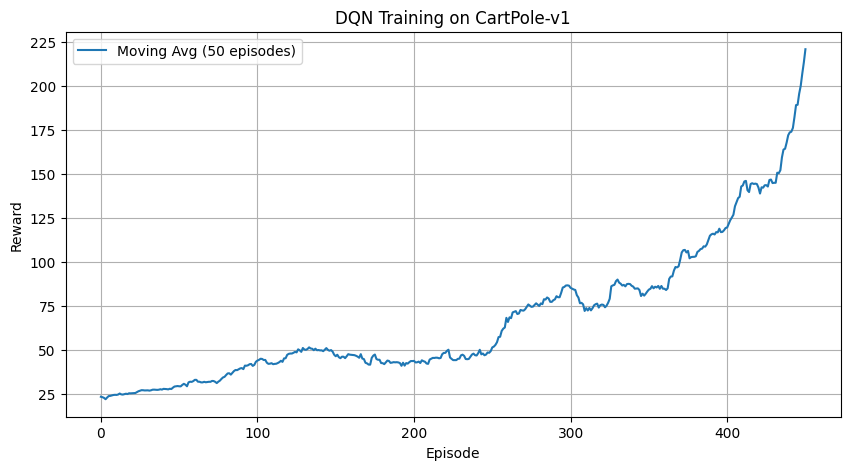


✅ Final Success Rate: 5.60% of episodes had reward >= 195.


In [24]:
def moving_avg(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10,5))
plt.plot(moving_avg(rewards_per_episode), label='Moving Avg (50 episodes)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('DQN Training on CartPole-v1')
plt.grid()
plt.legend()
plt.show()

success_rate = (success_count / N) * 100
print(f"\n✅ Final Success Rate: {success_rate:.2f}% of episodes had reward >= 195.")
